In [1]:
%%bash
cd Data_Sets/COVID_19_Tracking/

curl -O https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
curl -O https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
curl -O https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 54836  100 54836    0     0   309k      0 --:--:-- --:--:-- --:--:--  309k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45681  100 45681    0     0   343k      0 --:--:-- --:--:-- --:--:--  343k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46789  100 46789    0     0   359k      0 --:--:-- --:--:-- --:--:--  359k


In [2]:
#the data is from https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Read in the tables with pandas
confirmed_global = pd.read_csv('Data_Sets/COVID_19_Tracking/time_series_covid19_confirmed_global.csv', keep_default_na=False)
deaths_global = pd.read_csv('Data_Sets/COVID_19_Tracking/time_series_covid19_deaths_global.csv', keep_default_na=False)
recovered_global = pd.read_csv('Data_Sets/COVID_19_Tracking/time_series_covid19_recovered_global.csv', keep_default_na=False)

#print out the top 5 entries of the dataset
print(confirmed_global.head(3))

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0                   Afghanistan  33.0000  65.0000        0        0        0   
1                       Albania  41.1533  20.1683        0        0        0   
2                       Algeria  28.0339   1.6596        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/23/20  3/24/20  3/25/20  3/26/20  \
0        0        0        0  ...       40       74       84       94   
1        0        0        0  ...      104      123      146      174   
2        0        0        0  ...      230      264      302      367   

   3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  
0      110      110      120      170      174     237  
1      186      197      212      223      243     259  
2      409      454      511      584      716     847  

[3 rows x 75 columns]


In [3]:
#an empty array to hold a list of dates
date_list = []
#create an empty dictionary for countries/regions with their provinces/states
state_country_dict = {}


#get a list of dates from the column names
date_list = list(confirmed_global)
date_list = date_list[4:]

#loop through the confirmed_global table
for index, row in confirmed_global.iterrows():
    #if the country/region isn't in the dictionary then add it
    if row['Country/Region'] not in state_country_dict:
        #set the values as a list so i can append to them when needed
        state_country_dict[row['Country/Region']] = [row['Province/State']]
    #if it is in then add onto it
    else:
        state_country_dict[row['Country/Region']].append(row['Province/State'])

In [4]:
#Print out a list of countries
country_list = list(state_country_dict.keys())
print(*country_list, sep=", ")

#Grab input on which country to select
region_input = input("Please enter a country (Case-Sensitive): ")

print()
#if the region has a states
if state_country_dict[region_input] != ['']:
    #Print out a list of states for that country
    state_list = list(state_country_dict[region_input])
    print(*state_list, sep=", ")
    
    #Grab input on which state to select
    state_input = input("Please enter a state (Case-Sensitive): ")
#otherwise enter nothing
else:
    state_input = ''


Afghanistan, Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Brunei, Bulgaria, Burkina Faso, Cabo Verde, Cambodia, Cameroon, Canada, Central African Republic, Chad, Chile, China, Colombia, Congo (Brazzaville), Congo (Kinshasa), Costa Rica, Cote d'Ivoire, Croatia, Diamond Princess, Cuba, Cyprus, Czechia, Denmark, Djibouti, Dominican Republic, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Estonia, Eswatini, Ethiopia, Fiji, Finland, France, Gabon, Gambia, Georgia, Germany, Ghana, Greece, Guatemala, Guinea, Guyana, Haiti, Holy See, Honduras, Hungary, Iceland, India, Indonesia, Iran, Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Korea, South, Kuwait, Kyrgyzstan, Latvia, Lebanon, Liberia, Liechtenstein, Lithuania, Luxembourg, Madagascar, Malaysia, Maldives, Malta, Mauritania, Mauriti

[14, 22, 35, 39, 66, 77, 86, 106, 109, 133, 158, 181, 199, 204, 228, 242, 263, 279, 287, 291, 291, 293, 294, 289, 273, 268, 263, 261, 244, 238, 223, 217, 206, 197, 181, 161, 157, 146, 132, 129, 124, 118, 113, 113, 115, 115, 112, 105, 101, 101, 93, 86, 80, 81, 84, 79, 83, 92, 93, 100, 114, 129, 149, 150, 152, 153, 155, 157, 154, 154, 154]


<IPython.core.display.Javascript object>


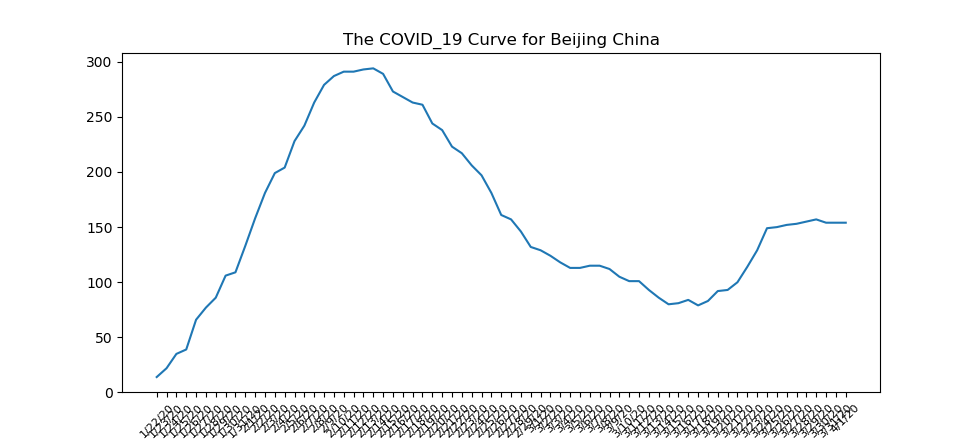

In [5]:
%matplotlib notebook

#filter the confirmed global down to the region then to the state
confirmed = confirmed_global[confirmed_global['Country/Region'] == region_input]
confirmed = confirmed[confirmed['Province/State'] == state_input]

#filter the deaths global down to the region then to the state
deaths = deaths_global[deaths_global['Country/Region'] == region_input]
deaths = deaths[deaths['Province/State'] == state_input]

#filter the recovered global down to the region then to the state
recovered = recovered_global[recovered_global['Country/Region'] == region_input]
recovered = recovered[recovered['Province/State'] == state_input]

total = []
total_dates = []

for i in date_list:
    if confirmed[i].values > 0:
        total_dates.append(i)
        total.append(int(confirmed[i].values - deaths[i].values - recovered[i].values))

print(total)
    
plt.plot(total_dates, total)

plt.title("The COVID_19 Curve for " + state_input + " " + region_input)
plt.tick_params(axis='x', labelsize=8, labelrotation=45)

plt.show()